In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from colorama import Fore

from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn import metrics
from scipy import stats
import math

from tqdm.notebook import tqdm
from copy import deepcopy

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

plt.rcParams['axes.facecolor'] = primary_bgcolor

colors = [primary_blue, primary_blue2, primary_blue3, primary_grey, primary_black, primary_bgcolor, primary_green]
sns.palplot(sns.color_palette(colors))

In [ ]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['font.family'] = 'serif'

# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">🏄‍♂️ AutoML Libraries Comparison 📈</p>

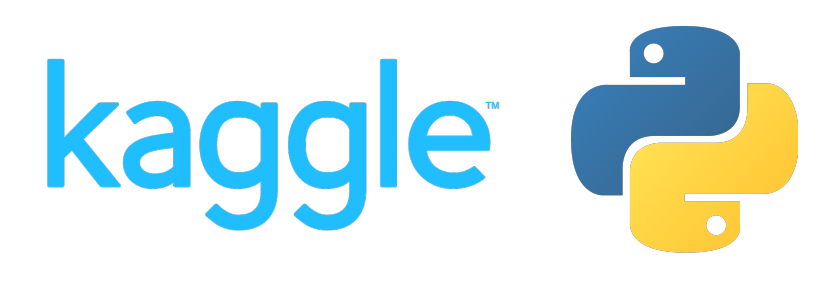

The main idea of this kernel is to compare the most popular AutoMl algorithems in terms of setup and competition performance (f1-score).

In all the cases I will just limit the time to 5 minutes (it could be better to use more time, but you can always fork and try yourselfs). The idea is to give a baseline so you can use the one is easier for you or the one the better performs.

As the data is synthetic, I will do just some simple feature engineering. With this method, we can also compare how all the libraries handle categorical data etc.

In recent years, the demand for machine learning experts has outpaced the supply, despite the surge of people entering the field. To address this gap, there have been big strides in the development of user-friendly machine learning software that can be used by non-experts. The first steps toward simplifying machine learning involved developing simple, unified interfaces to a variety of machine learning algorithms.

As you are going to see, many of the libraries are not going to be run because of machine resources and some packages issues with Kaggle Docker environment. Anyway, the idea is to show how to use it, which functions to use, and how simple it is. Remember that you can fork and try your self on your self computer.

<a id='table-of-contents'></a>
<h2 style="font-family: Serif; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;">TABLE OF CONTENTS</h2>

---

<h3 style="text-indent: 10vw; font-family: Serif; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#1">I&nbsp;&nbsp;&nbsp;&nbsp;LightAutoML</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Serif; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#2">II&nbsp;&nbsp;&nbsp;&nbsp;H2O AutoML</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Serif; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#3">III&nbsp;&nbsp;&nbsp;&nbsp;MLJAR AutoML</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Serif; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#4">IV&nbsp;&nbsp;&nbsp;&nbsp;PyCaret</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Serif; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#5">V&nbsp;&nbsp;&nbsp;&nbsp;EvalML alteryx</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Serif; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#6">VI&nbsp;&nbsp;&nbsp;&nbsp;TPOT: AutoML Genetic Appoach </a></h3>

---

<h3 style="text-indent: 10vw; font-family: Serif; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#7">VII&nbsp;&nbsp;&nbsp;&nbsp;FLAML: Microsoft AutoML Framework</a></h3>

---

In [ ]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/train.csv')
train_df.columns = [column.lower() for column in train_df.columns]
# train_df = train_df.drop(columns=['passengerid'])

test_df = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/test.csv')
test_df.columns = [column.lower() for column in test_df.columns]

submission = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv')
submission.head()

train_df.head()

In [ ]:
feature_cols = train_df.drop(['survived', 'passengerid'], axis=1).columns
target_column = 'survived'

## Getting all the data that are not of "object" type. 
numerical_columns = ['age', 'fare']
categorical_columns = train_df[feature_cols].drop(columns=numerical_columns).columns

pure_num_cols = train_df[feature_cols].select_dtypes(include=['int64','float64']).columns
pure_cat_cols = train_df[feature_cols].select_dtypes(exclude=['int64','float64']).columns

print(len(numerical_columns), len(categorical_columns))

<a id='1'></a>
[back to top](#table-of-contents)
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">1. LightAutoML</p>

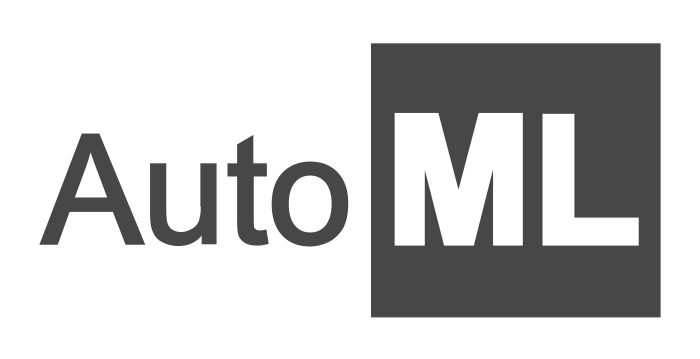

LightAutoML is open-source Python library aimed at automated machine learning. It is designed to be lightweight and efficient for various tasks with tabular, text data. LightAutoML provides easy-to-use pipeline creation, that enables:

* Automatic hyperparameter tuning, data processing.
* Automatic typing, feature selection.
* Automatic time utilization.
* Automatic report creation.
* Graphical profiling system.
* Easy-to-use modular scheme to create your own pipelines.

Ref: https://github.com/sberbank-ai-lab/LightAutoML

In [ ]:
!pip install -U lightautoml

In [ ]:
# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task
from lightautoml.utils.profiler import Profiler

import torch

In [ ]:
N_THREADS = 4 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 300 # Time in seconds for automl run

np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [ ]:
def acc_score(y_true, y_pred, **kwargs):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int), **kwargs)

def f1_metric(y_true, y_pred, **kwargs):
    return f1_score(y_true, (y_pred > 0.5).astype(int), **kwargs)

task = Task('binary', metric = f1_metric)

roles = {
    'target': 'survived',
    'drop': ['passengerid', 'name', 'ticket'],
}

In [ ]:
%%time 
automl = TabularUtilizedAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned']]},
                       reader_params = {'n_jobs': N_THREADS})
oof_pred = automl.fit_predict(train_df, roles = roles)
print('oof_pred:\n{}\nShape = {}'.format(oof_pred[:10], oof_pred.shape))

In [ ]:
%%time
test_pred = automl.predict(test_df)
print('Prediction for test data:\n{}\nShape = {}'.format(test_pred[:10], test_pred.shape))

print('Check scores...')
print('OOF score: {}'.format(acc_score(train_df['survived'].values, oof_pred.data[:, 0])))

In [ ]:
submission['Survived'] = (test_pred.data[:, 0] > 0.5).astype(int)
submission.to_csv('lightautoml_utilized_300s_f1_metric.csv', index = False)
submission.head()

<a id='2'></a>
[back to top](#table-of-contents)
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">2. H2O AutoML</p>

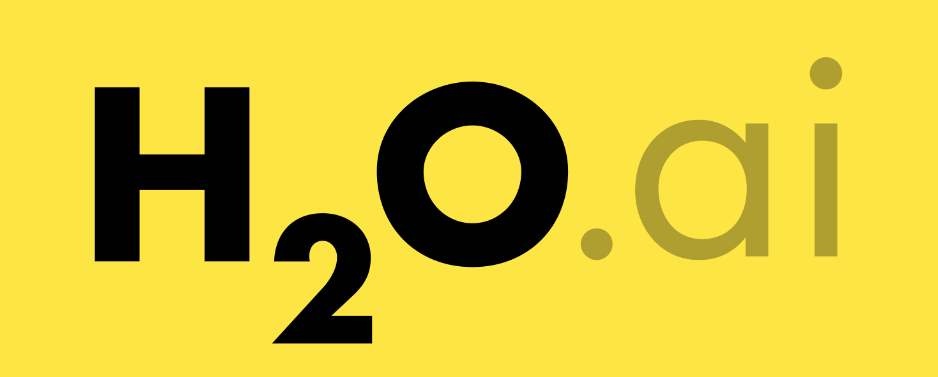

The H2O AutoML interface is designed to have as few parameters as possible so that all the user needs to do is point to their dataset, identify the response column and optionally specify a time constraint or limit on the number of total models trained.

In both the R and Python API, AutoML uses the same data-related arguments, x, y, training_frame, validation_frame, as the other H2O algorithms. Most of the time, all you’ll need to do is specify the data arguments. You can then configure values for max_runtime_secs and/or max_models to set explicit time or number-of-model limits on your run.

Ref: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

In [ ]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2021/train.csv')
train_df.columns = [column.lower() for column in train_df.columns]
# train_df = train_df.drop(columns=['passengerid'])

test_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2021/test.csv')
test_df.columns = [column.lower() for column in test_df.columns]

submission = pd.read_csv('/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv')
submission.head()

train_df.head()

In [ ]:
feature_columns = train_df.iloc[:, 1:-1].columns.values
target_column = 'target'
feature_columns

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

In [ ]:
train_hf = h2o.H2OFrame(train_df.copy())
test_hf = h2o.H2OFrame(test_df.copy())

In [ ]:
train_hf[target_column] = train_hf[target_column].asfactor()

In [ ]:
%%time
aml = H2OAutoML(
    seed=2021, 
    max_runtime_secs=100,
    nfolds = 3,
    exclude_algos = ["DeepLearning"]
)

aml.train(
    x=list(feature_columns), 
    y=target_column, 
    training_frame=train_hf
)

In [ ]:
lb = aml.leaderboard 
lb.head(rows = lb.nrows)

In [ ]:
%%time

preds = aml.predict(h2o.H2OFrame(test_df[feature_columns].copy()))
preds_df = h2o.as_list(preds)
preds_df

submission[['Class_1', 'Class_2', 'Class_3', 'Class_4']] = preds_df[['Class_1', 'Class_2', 'Class_3', 'Class_4']]
submission.to_csv('h2o_automl_300s.csv', index=False)
submission.head()

## Titanic

In [ ]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.columns = [column.lower() for column in train_df.columns]
# train_df = train_df.drop(columns=['passengerid'])

test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.columns = [column.lower() for column in test_df.columns]

submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

feature_columns = train_df.drop(['survived', 'passengerid'], axis=1).columns
target_column = 'survived'

train_hf = h2o.H2OFrame(train_df.copy())
test_hf = h2o.H2OFrame(test_df.copy())

train_df.head()

In [ ]:
%%time
aml = H2OAutoML(
    seed=2021, 
    max_runtime_secs=100,
    nfolds = 3,
    exclude_algos = ["DeepLearning"]
)

aml.train(
    x=list(feature_columns), 
    y=target_column, 
    training_frame=train_hf
)

In [ ]:
lb = aml.leaderboard 
lb.head(rows = lb.nrows)

<a id='3'></a>
[back to top](#table-of-contents)
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">3. MLJAR AutoML</p>

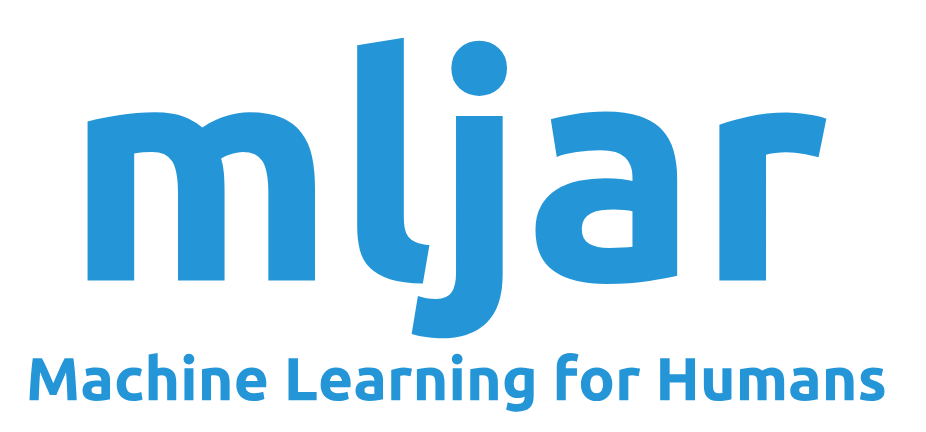

MLJAR is an Automated Machine Learning framework. It is available as Python package with code at GitHub: https://github.com/mljar/mljar-supervised

The MLJAR AutoML can work in several modes:

* **Explain** - ideal for initial data exploration
* **Perform** - perfect for production-level ML systems
* **Compete** - mode for ML competitions under restricted time budget. By the default, it performs advanced feature engineering like golden features search, kmeans features, feature selection. It does model stacking.
* **Optuna** - uses Optuna to highly tune algorithms: `Random Forest`, `Extra Trees`, `Xgboost`, `LightGBM`, `CatBoost`, `Neural Network`. Each algorithm is tuned with Optuna hperparameters framework with selected time budget (controlled with optuna_time_budget). By the default feature engineering is not enabled (you need to manually swtich it on, in AutoML() parameter).

Ref: https://www.kaggle.com/mt77pp/mljar-automl-tps-apr-21

*These execution cells are not going to be executed as MLJAR is getting troubles to be installed in Kaggle kernels environment*

In [ ]:
%%script false --no-raise-error
!apt-get install -y build-essential python3-dev

In [ ]:
%%script false --no-raise-error
!pip -q install pip --upgrade
!pip install graphviz --upgrade
!pip install dtreeviz
!pip install mljar-supervised

In [ ]:
%%script false --no-raise-error
from supervised.automl import AutoML # mljar-supervised

In [ ]:
%%script false --no-raise-error
%%time
automl = AutoML(
    mode="Compete", 
    eval_metric="f1",
    total_time_limit=300,
    features_selection=False # switch off feature selection
)
automl.fit(
    train[feature_cols], 
    train[target_column]
)

In [ ]:
%%script false --no-raise-error
%%time
preds = automl.predict(test[feature_cols])

submission['Survived'] = preds
submission.to_csv('mljar_automl_300s_f1_metric.csv', index=False)
submission.head()

<a id='4'></a>
[back to top](#table-of-contents)
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">4. PyCaret</p>

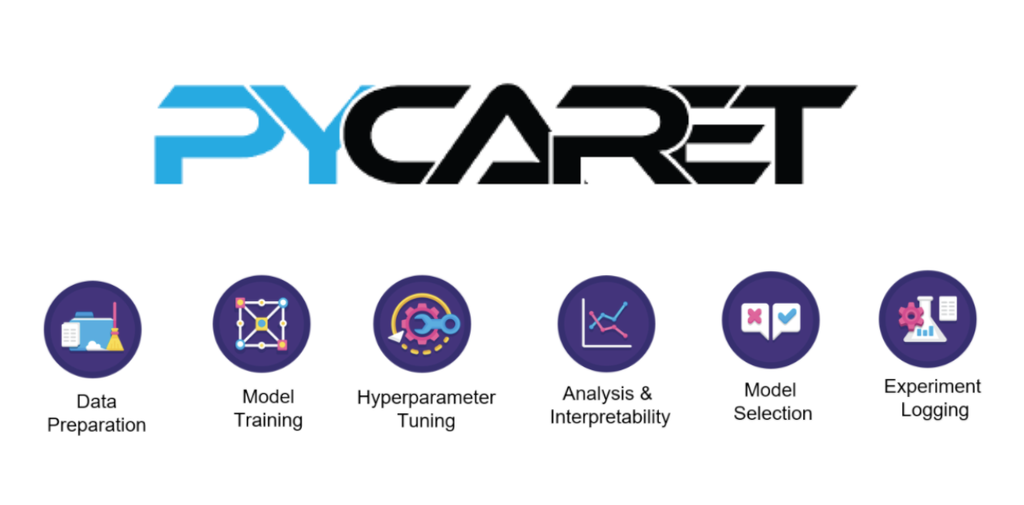

*These execution cells are not going to be executed as Pycaret spent so much resources and time and cant be executed in Kaggle kernels environment. You can always fork/clone and execute locally*

In [ ]:
%%script false --no-raise-error
!pip install pycaret

In [ ]:
%%script false --no-raise-error
from pycaret.classification import *

In [ ]:
%%script false --no-raise-error
from category_encoders.cat_boost import CatBoostEncoder

cat_train_df = train_df.copy()
cat_test_df = test_df.copy()

ce = CatBoostEncoder()

cols_to_encode = ['name', 'sex', 'ticket', 'cabin', 'embarked']
cat_train_df[pure_cat_cols] = ce.fit_transform(cat_train_df[pure_cat_cols], cat_train_df[target_column])
cat_test_df[pure_cat_cols] = ce.transform(cat_test_df[pure_cat_cols])

In [ ]:
%%script false --no-raise-error
setup(
    data = cat_train_df[feature_cols.to_list() + [target_column]], 
    target = target_column,
    fold = 3,
    silent = True,
)

In [ ]:
%%script false --no-raise-error
%%time
best_models = compare_models(
    sort='F1', 
    n_select=3, 
    budget_time=300,
) # we will use it later

In [ ]:
%%script false --no-raise-error
# select best model 
best = automl(optimize = 'F1')

In [ ]:
%%script false --no-raise-error
plot_model(best, plot = 'confusion_matrix')

plot_model(best, plot = 'feature_all')

<a id='5'></a>
[back to top](#table-of-contents)
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">5. EvalML: AutoML</p>

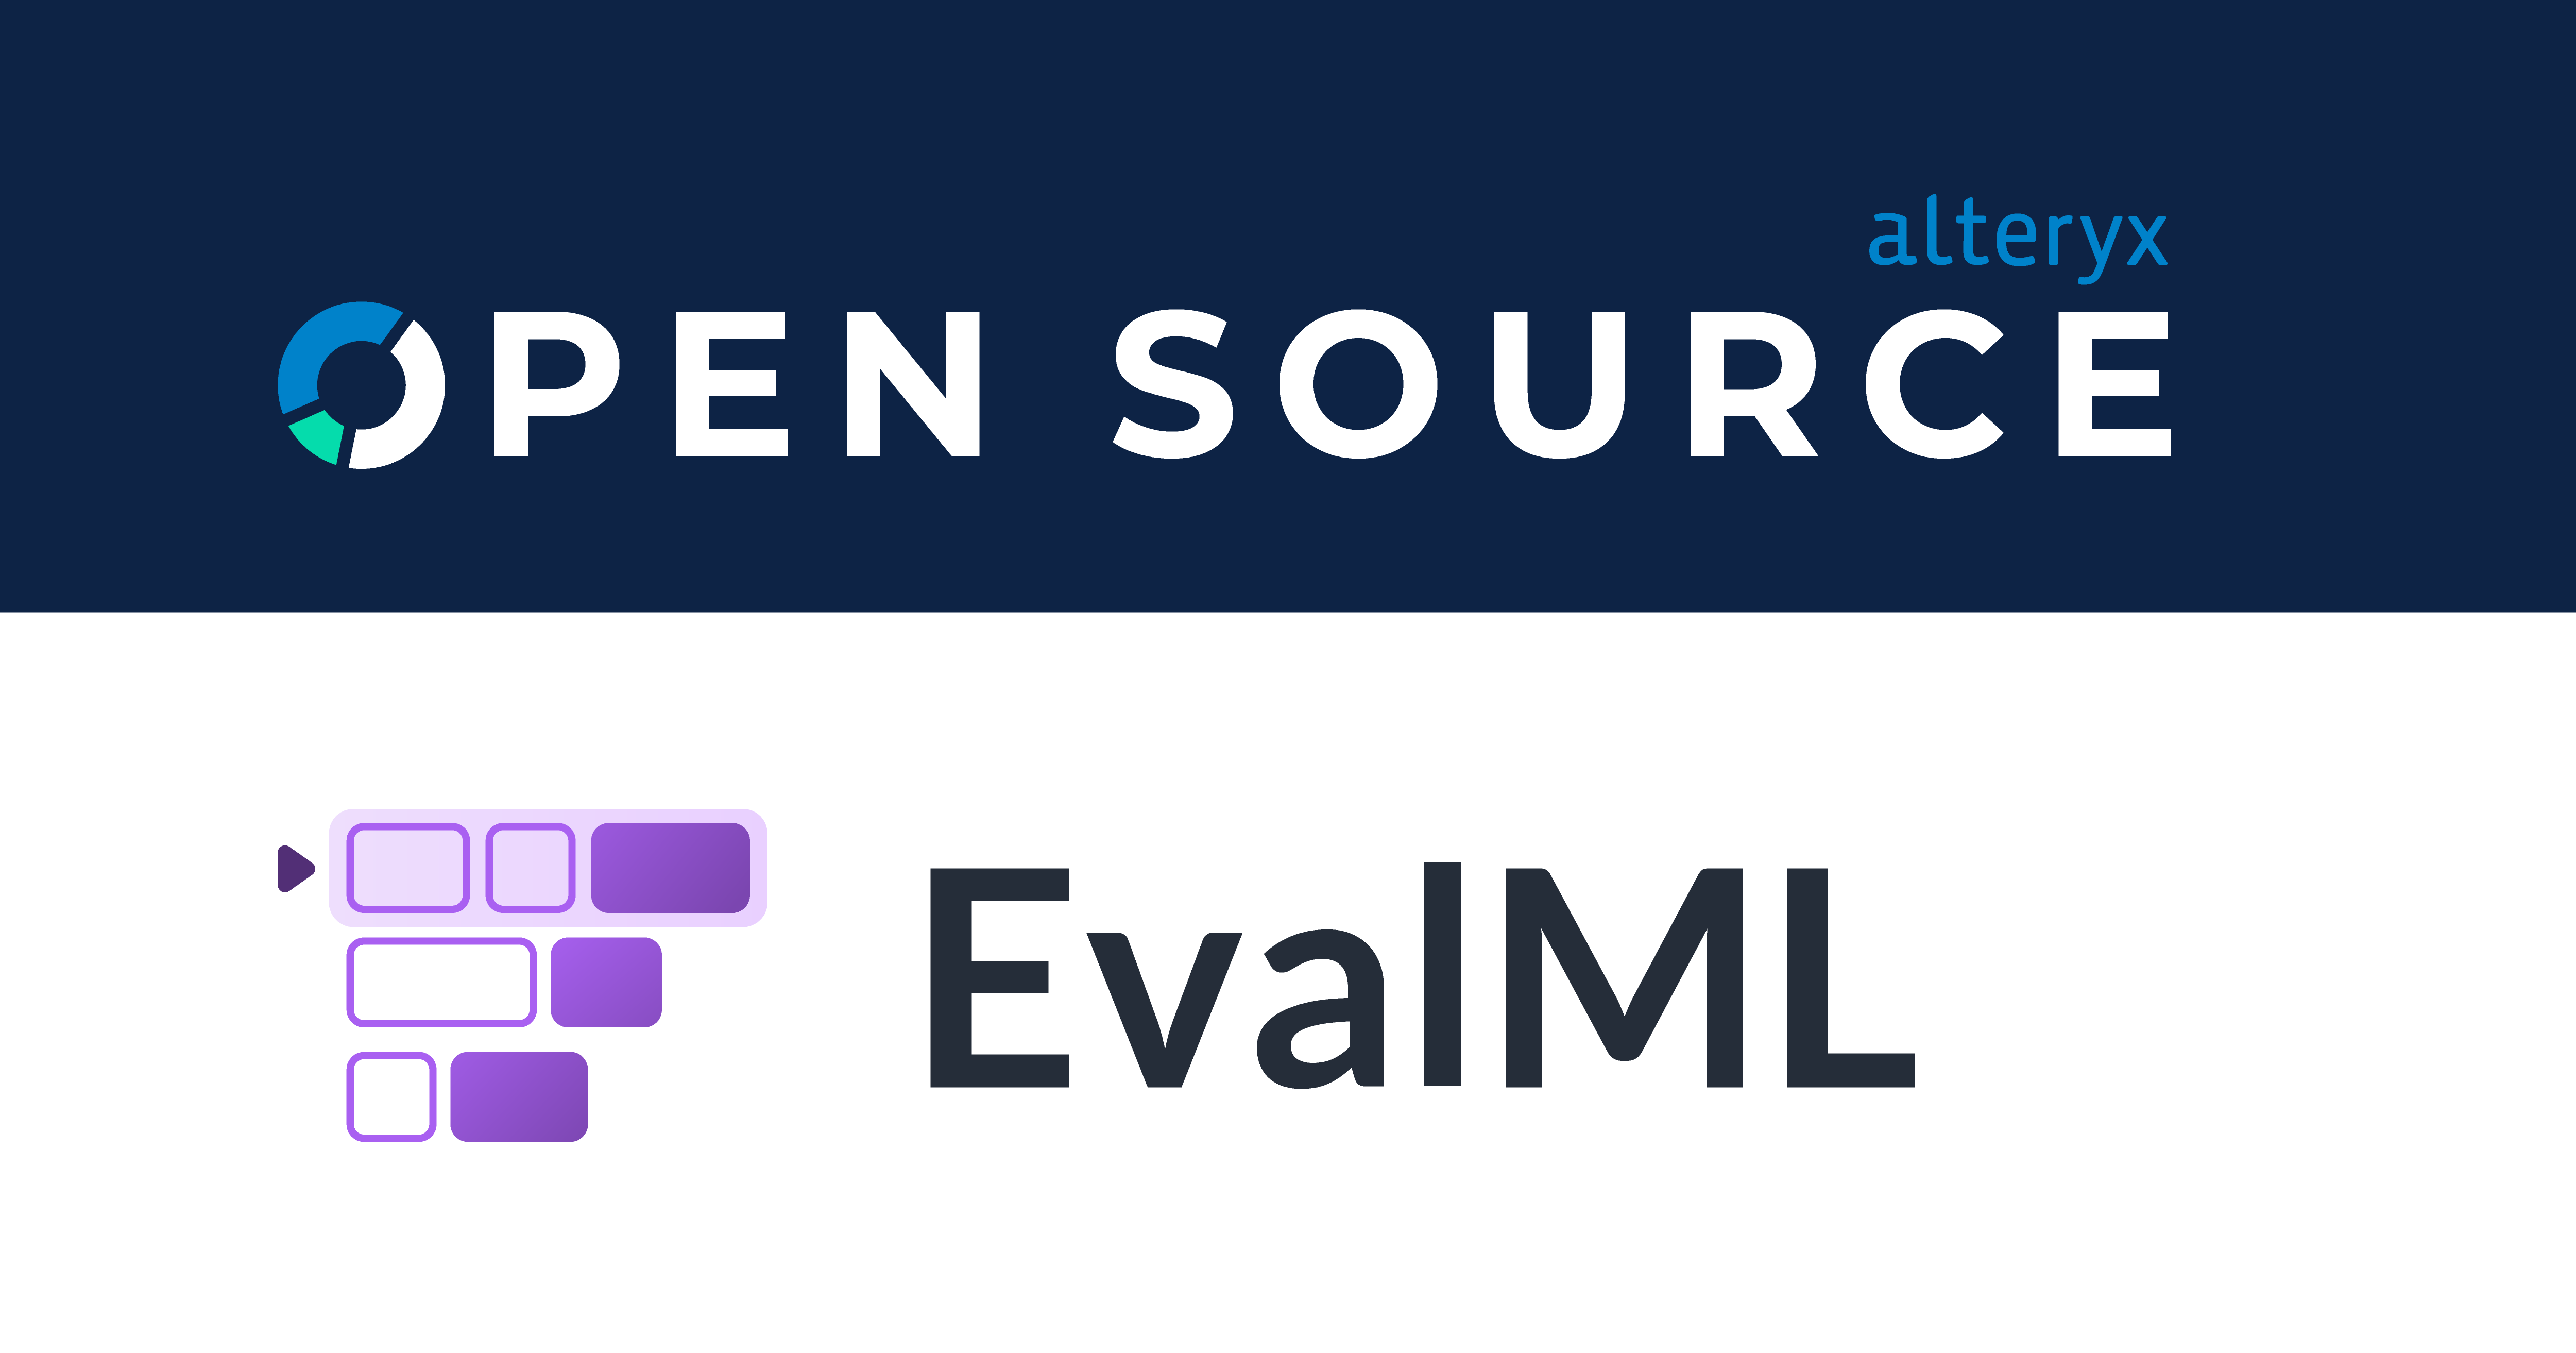

EvalML is an AutoML library which builds, optimizes, and evaluates machine learning pipelines using domain-specific objective functions.

**Key Functionality**
* **Automation** - Makes machine learning easier. Avoid training and tuning models by hand. Includes data quality checks, cross-validation and more.
* **Data Checks** - Catches and warns of problems with your data and problem setup before modeling.
* **End-to-end** - Constructs and optimizes pipelines that include state-of-the-art preprocessing, feature engineering, feature selection, and a variety of modeling techniques.
* **Model Understanding** - Provides tools to understand and introspect on models, to learn how they'll behave in your problem domain.
* **Domain-specific** - Includes repository of domain-specific objective functions and an interface to define your own.

Ref: https://evalml.alteryx.com/en/latest/_modules/evalml/automl/automl_search.html

In [ ]:
%%script false --no-raise-error
!pip install evalml

In [ ]:
%%script false --no-raise-error
from evalml.automl import AutoMLSearch

In [ ]:
%%script false --no-raise-error
X = train_df.drop(columns=[target_column, 'passengerid'])
y = train_df[target_column]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
%%script false --no-raise-error
%%time
automl = AutoMLSearch(
    X_train=X_train, 
    y_train=y_train, 
    problem_type='binary',
    random_seed=2021,
    max_time=300,
)

In [ ]:
%%script false --no-raise-error
automl.search()

In [ ]:
%%script false --no-raise-error
automl.rankings

In [ ]:
%%script false --no-raise-error
%%time
pipeline = automl.best_pipeline
pipeline.fit(X, y)

In [ ]:
%%script false --no-raise-error
preds = pipeline.predict(test_df.drop([target_column, 'passengerid'], axis=1))

submission['Survived'] = preds.to_series().astype(int)
submission.to_csv('evalml_automl_300s_f1_metric.csv', index=False)
submission.head()

<a id='6'></a>
[back to top](#table-of-contents)
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">6. TPOT: Genetic Approach</p>

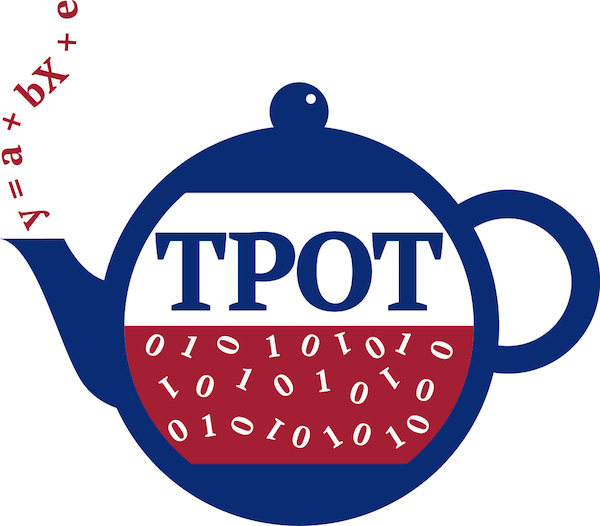

In [ ]:
%%script false --no-raise-error
!pip install tpot

In [ ]:
%%script false --no-raise-error
from category_encoders.cat_boost import CatBoostEncoder

cat_train_df = train_df.copy()
cat_test_df = test_df.copy()

ce = CatBoostEncoder()

cols_to_encode = ['name', 'sex', 'ticket', 'cabin', 'embarked']
cat_train_df[pure_cat_cols] = ce.fit_transform(cat_train_df[pure_cat_cols], cat_train_df[target_column])
cat_test_df[pure_cat_cols] = ce.transform(cat_test_df[pure_cat_cols])

In [ ]:
%%script false --no-raise-error
X = cat_train_df.drop(columns=[target_column, 'passengerid'])
y = cat_train_df[target_column]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [ ]:
%%script false --no-raise-error

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_digits_pipeline.py')

<a id='7'></a>
[back to top](#table-of-contents)
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">7. FLAML: Fast and Lightweight AutoML</p>

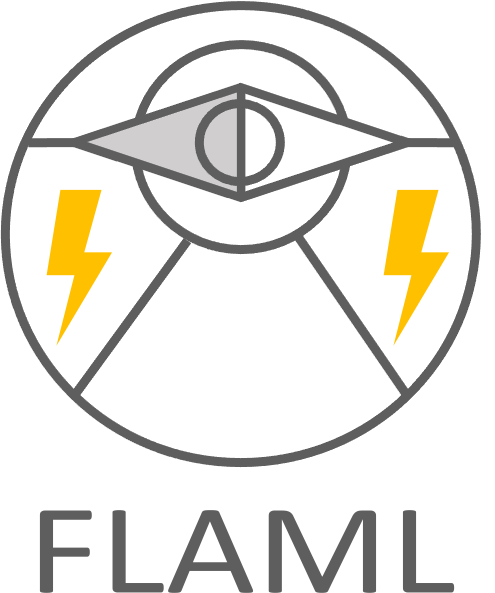

FLAML is a lightweight Python library that finds accurate machine learning models automatically, efficiently and economically. It frees users from selecting learners and hyperparameters for each learner. It is fast and economical. The simple and lightweight design makes it easy to extend, such as adding customized learners or metrics. FLAML is powered by a new, [cost-effective hyperparameter optimization and learner selection](https://github.com/microsoft/FLAML/tree/main/flaml/tune) method invented by Microsoft Research. FLAML leverages the structure of the search space to choose a search order optimized for both cost and error. For example, the system tends to propose cheap configurations at the beginning stage of the search, but quickly moves to configurations with high model complexity and large sample size when needed in the later stage of the search. For another example, it favors cheap learners in the beginning but penalizes them later if the error improvement is slow. The cost-bounded search and cost-based prioritization make a big difference in the search efficiency under budget constraints.

Ref: https://github.com/microsoft/FLAML

In [ ]:
%%script false --no-raise-error
!pip install flaml

In [ ]:
%%script false --no-raise-error
from flaml import AutoML
from sklearn.datasets import load_boston

In [ ]:
%%script false --no-raise-error
# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 300,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
}

In [ ]:
%%script false --no-raise-error
# Train with labeled input data
automl.fit(
    X_train=train_df[feature_cols], 
    y_train=train_df[target_column],
    **automl_settings
)

In [ ]:
%%script false --no-raise-error
# Predict
print(automl.predict_proba(train_df[feature_cols]))
# Export the best model
print(automl.model)

### Simple regression problem

In [ ]:
%%script false --no-raise-error

# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 10,  # in seconds
    "metric": 'r2',
    "task": 'regression',
    "log_file_name": "test/boston.log",
}

X_train, y_train = load_boston(return_X_y=True)
# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
                        **automl_settings)

# Predict
print(automl.predict(X_train))
# Export the best model
print(automl.model)